In [2]:
# As always, we first import several libraries that will be helpful to solve the tasks
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cv2 as cv

Linear Regression

In [3]:
def linearRegression_cof(X, Y):
    
    #concatenate ones 
    ones = np.ones((X.shape[0],1))
    X_c = np.c_[ones,X]
    
    #find t1 = (x^T.x)^-1*x^T
    t1 = np.linalg.pinv(X_c)
    
    #find t2 = (x^T.x)^-1*x^T.y
    t2 = np.matmul(t1,Y) 

    return t2

In [4]:
def predict(X, w):
    #concatenate ones 
    ones = np.ones((X.shape[0],1))
    X_c = np.c_[ones,X]
    
    #find y^
    
    return  np.matmul(X_c,w)

Load the Data

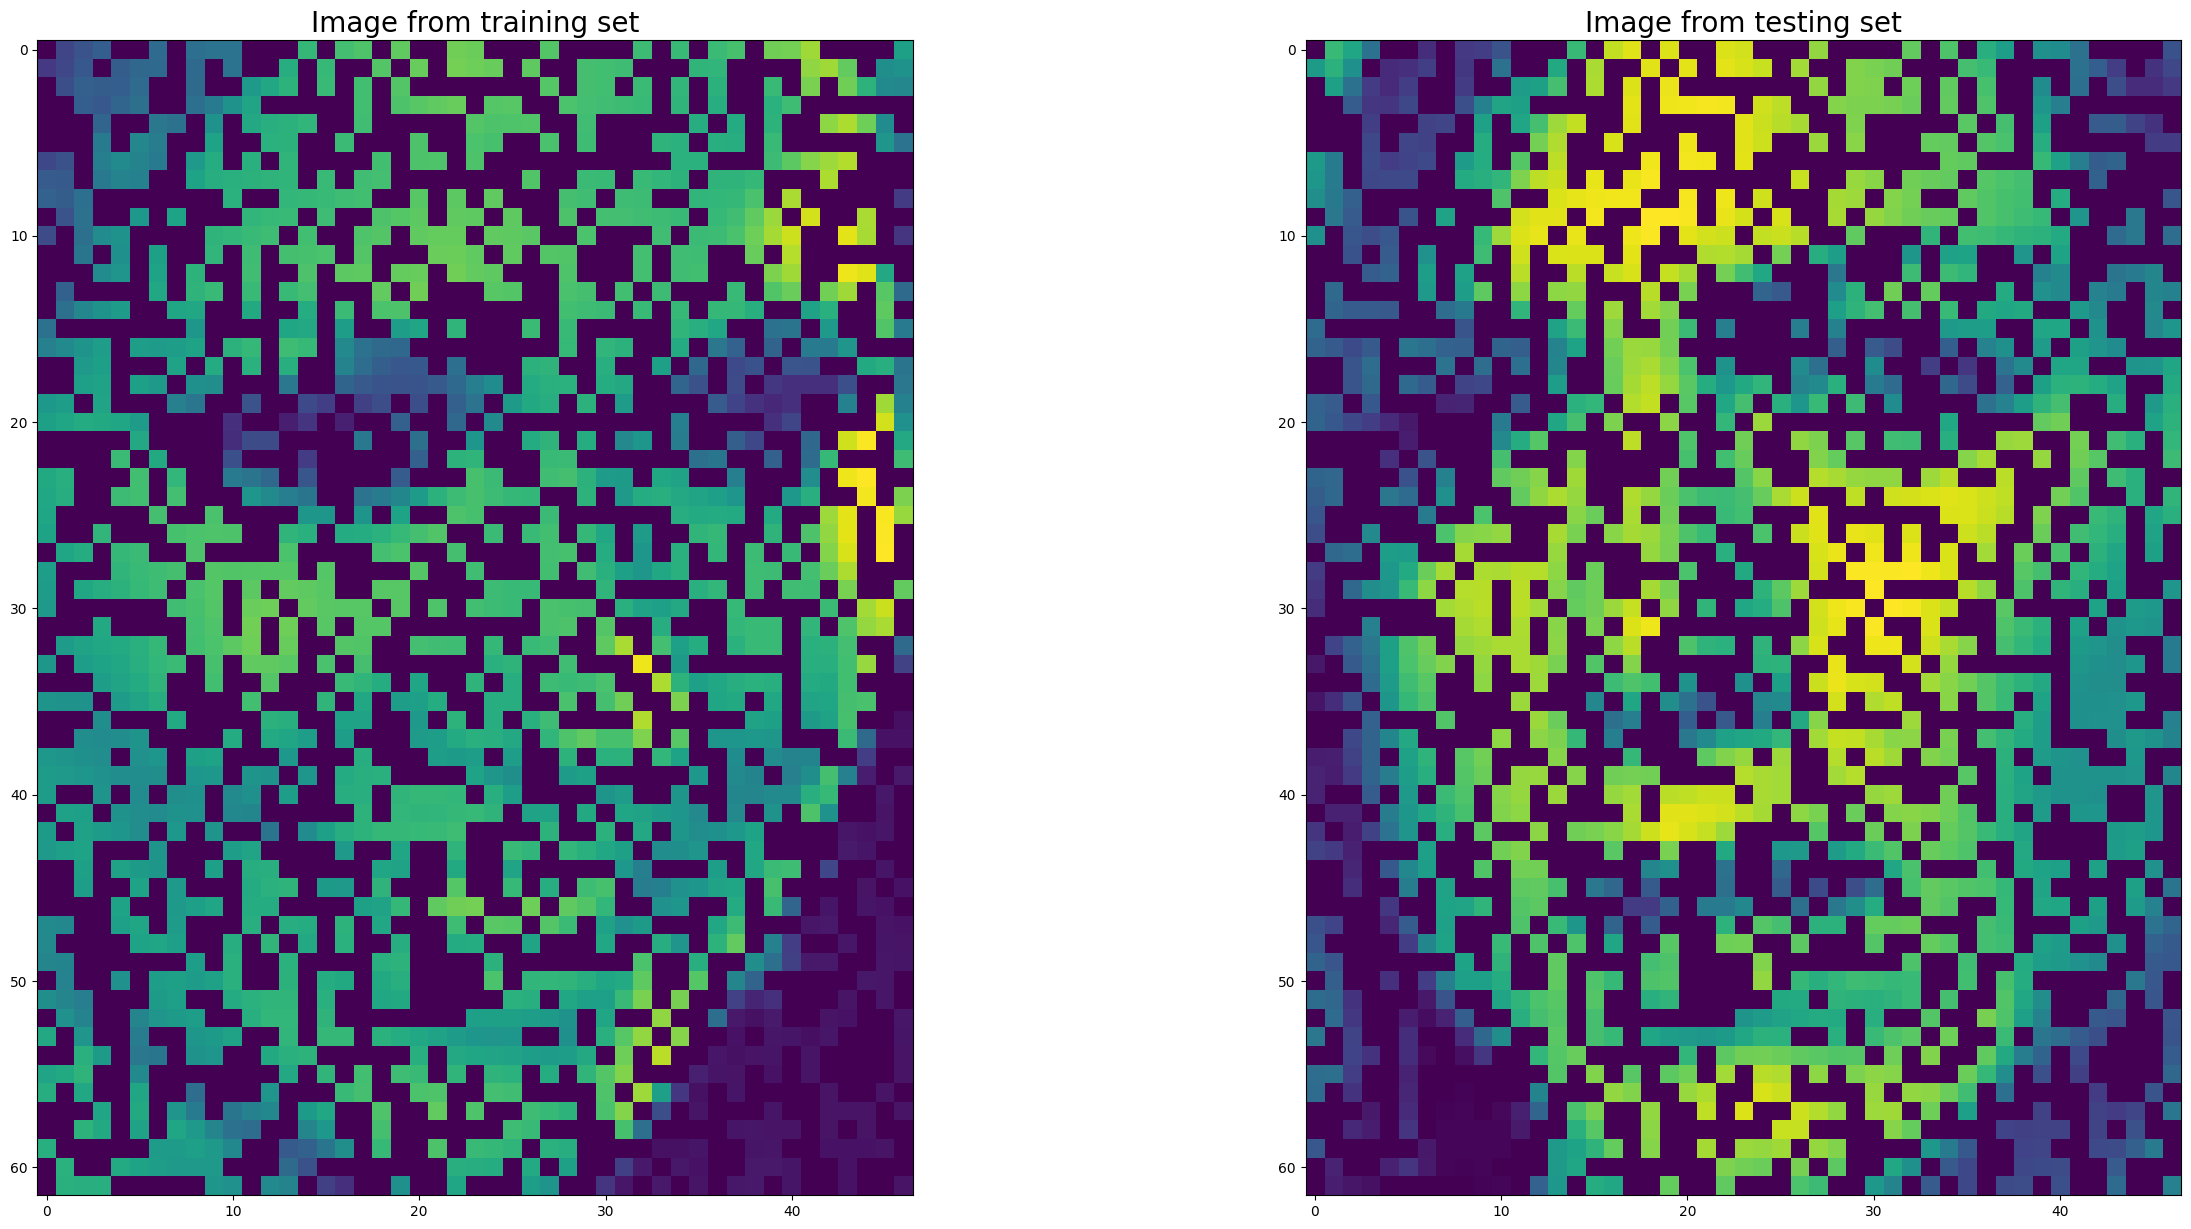

In [5]:
# Training set: Original images:    train_face_clean.npy
# Training set: Corrupted images:   train_face_crpt.npy
# Test set: Original images:        test_face_clean.npy
# Test set: Corrupted images:       test_face_crpt.npy

# Load data from drive


train_clean = np.load('data/train_face_clean.npy')
train_crpt = np.load('data/train_face_crpt.npy')
test_clean = np.load('data/test_face_clean.npy')
test_crpt = np.load('data/test_face_crpt.npy')

#grabbing the images 
train_crpt_test = train_crpt[5]
test_crpt_test = test_crpt[8]


fig = plt.figure(figsize=plt.figaspect(2.))
fig.set_figwidth(30)
fig.set_figheight(15)

#plotting from the training set 
ax = fig.add_subplot(1,2,1)
ax.imshow(train_crpt_test)
ax.set_title('Image from training set', fontsize = 20)

#plotting from the testing set 
ax = fig.add_subplot(1,2,2)
ax.imshow(test_crpt_test)
ax.set_title('Image from testing set', fontsize = 20)

plt.show()

Fitting the regression model

In [6]:
def regression_fit(samples_X, samples_Y):
    # input arguments: 
    #    samples_X: training samples
    #    samples_Y: training 'labels' (uncorrupted/clean samples)
    # output:
    #    reg_cof: regression coefficients (parameters)
    h_X, w_X, d_X = samples_X.shape   
    
    #reshaping the samples to be able to find the regression coefficients 
    X = np.reshape(np.copy(samples_X), (h_X, w_X*d_X))
    Y = np.reshape(np.copy(samples_Y), (h_X, w_X*d_X))
    
    #calling the linear regression cof function 
    reg_cof = linearRegression_cof(X,Y)
    
    return reg_cof

In [7]:
def predict_mod(samples, reg_cof):
    # input arguments: 
    #    samples: np.array with image data, shape (N, h, w)
    #    reg_cof: regression coefficients / parameters
    # output:
    #    rest_samples: restored samples -- np.array with image data, shape (N, h, w)
    
    h_X, w_X, d_X = samples.shape
    
    #reshaping samples to be able to do matrix multiplication 
    X = np.reshape(np.copy(samples),(h_X,w_X*d_X))
    
    #adding ones to the first column of the reshaped matrix to take into account bias 
    ones = np.ones((h_X,1))
    X_c = np.c_[ones,X]
    
    #performing matrix multiplication
    tmp = np.matmul(X_c,reg_cof)
    
    #reshaping the images into the proper format 
    rest_samples = np.reshape(tmp,(h_X, w_X, d_X))
     
    return rest_samples

Fix the corrupted images 

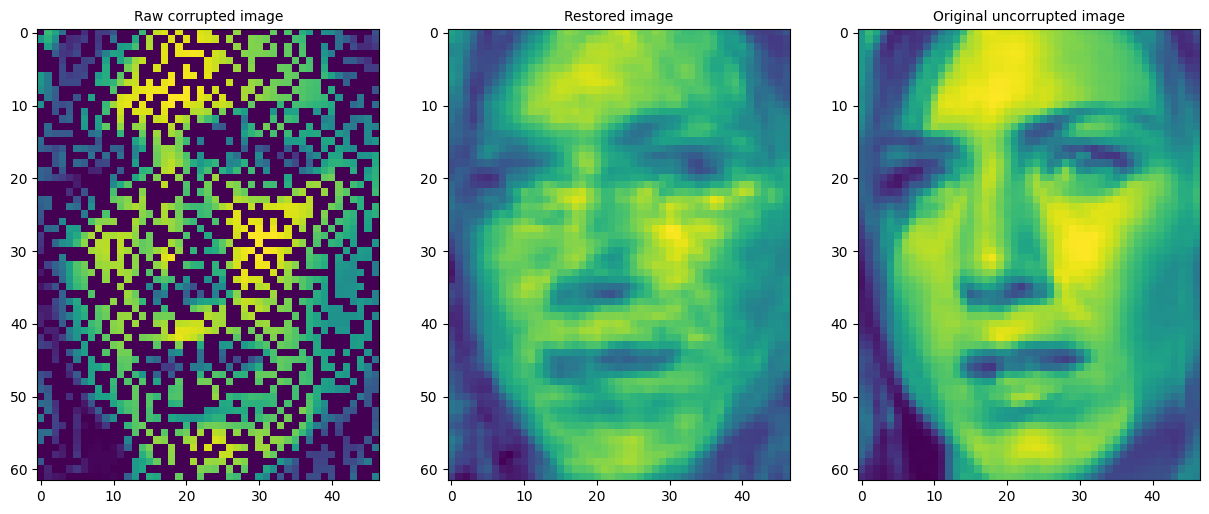

In [8]:
# Retrieve the regression parameters
reg_cof = regression_fit(train_crpt, train_clean)

# Predict / Restore images of the test set

rest_samples_test = predict_mod(test_crpt,reg_cof)
# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean test img', 'Corrupted test img', 'Restored test img')

fig = plt.figure(figsize=plt.figaspect(2.))
fig.set_figwidth(15)
fig.set_figheight(8)

#plotting the raw image 
ax = fig.add_subplot(1,3,1)
ax.imshow(test_crpt[8])
ax.set_title('Raw corrupted image', fontsize = 10)

#plotting the restored image
ax = fig.add_subplot(1,3,2)
ax.imshow(rest_samples_test[8])
ax.set_title('Restored image', fontsize = 10)

#plotting the original uncorrupted image 
ax = fig.add_subplot(1,3,3)
ax.imshow(test_clean[8])
ax.set_title('Original uncorrupted image', fontsize = 10)

plt.show()

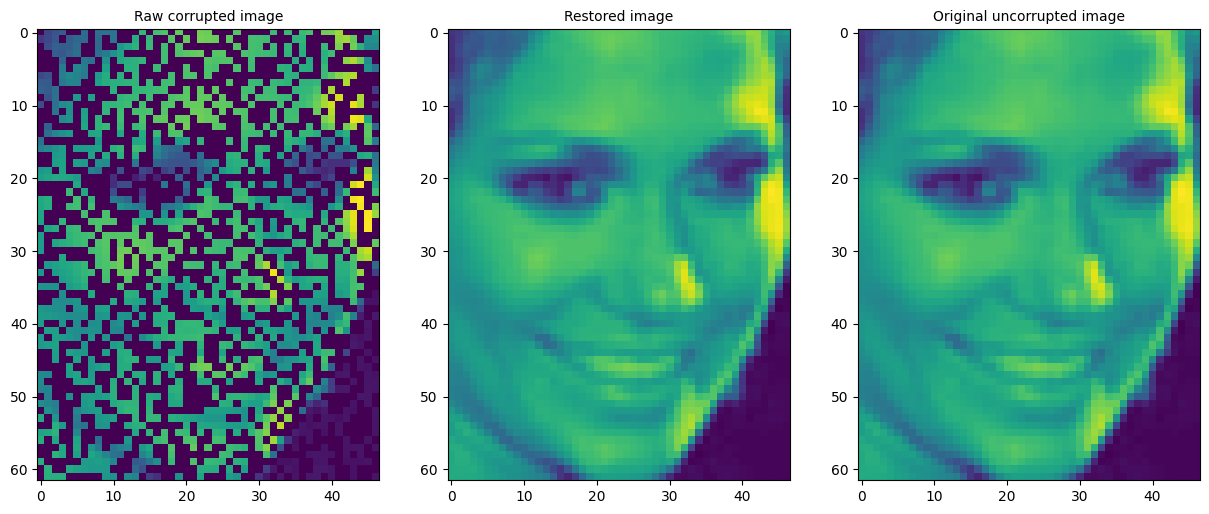

In [9]:
rest_samples_train = predict_mod(train_crpt,reg_cof)
# Display the reconstructed versions of the previously chosen corrupted test image alongside the original and corrupted one
# (Side-by-side plot of all three images: 'Clean train img', 'Corrupted train img', 'Restored train img')
fig = plt.figure(figsize=plt.figaspect(2.))
fig.set_figwidth(15)
fig.set_figheight(8)

#plotting the raw image 
ax = fig.add_subplot(1,3,1)
ax.imshow(train_crpt[5])
ax.set_title('Raw corrupted image', fontsize = 10)

#plotting the restored image
ax = fig.add_subplot(1,3,2)
ax.imshow(rest_samples_train[5])
ax.set_title('Restored image', fontsize = 10)

#plotting the original uncorrupted image 
ax = fig.add_subplot(1,3,3)
ax.imshow(train_clean[5])
ax.set_title('Original uncorrupted image', fontsize = 10)

plt.show()